###Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

###Load and Explore Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Palm pressure/palm_final.csv')

In [3]:
df.head()

,BMI,fiber1_sensor1,Pressure,Gender,Dominant_Hand,Posture
0,17.2,1538.739,10.261327,F,R,1
1,20.8,1538.746,34.204424,F,R,1
2,15.9,1538.756,68.408848,F,L,1
3,24.8,1538.767,106.033715,M,R,1
4,25.9,1538.771,119.715485,M,R,1


In [4]:
df.tail()

,BMI,fiber1_sensor1,Pressure,Gender,Dominant_Hand,Posture
51,24.8,1538.789727,183.770110,M,R,7
52,25.9,1538.765327,100.311315,M,R,7
53,19.2,1538.765521,100.974881,M,R,7
54,19.2,1538.770125,116.722598,M,R,7
55,20.7,1538.764798,98.501901,F,R,7


In [5]:
df.sample(10)

,BMI,fiber1_sensor1,Pressure,Gender,Dominant_Hand,Posture
46,19.2,1538.767874,109.023182,M,R,6
35,24.8,1538.749612,46.559062,M,R,5
9,20.8,1538.746000,34.204424,F,R,2
41,20.8,1538.746098,34.539628,F,R,6
13,19.2,1538.765947,102.431989,M,R,2
51,24.8,1538.789727,183.770110,M,R,7
7,20.7,1538.767000,106.033715,F,R,1
36,25.9,1538.736393,1.344234,M,R,5
30,19.2,1538.770331,117.427209,M,R,4
53,19.2,1538.765521,100.974881,M,R,7


In [6]:
df.shape

(56, 6)

In [7]:
df.dtypes

BMI               float64
fiber1_sensor1    float64
Pressure          float64
Gender             object
Dominant_Hand      object
Posture             int64
dtype: object

In [8]:
df.isnull().sum()

BMI               0
fiber1_sensor1    0
Pressure          0
Gender            0
Dominant_Hand     0
Posture           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             56 non-null     float64
 1   fiber1_sensor1  56 non-null     float64
 2   Pressure        56 non-null     float64
 3   Gender          56 non-null     object 
 4   Dominant_Hand   56 non-null     object 
 5   Posture         56 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.8+ KB


In [10]:
df.describe()

,BMI,fiber1_sensor1,Pressure,Posture
count,56.000000,56.000000,56.000000,56.0000
mean,20.462500,1538.761157,86.047203,4.0000
std,3.254064,0.015617,53.418674,2.0181
min,15.900000,1538.736393,1.344234,1.0000
25%,18.700000,1538.747344,38.801499,2.0000
50%,19.950000,1538.763896,95.416662,4.0000
75%,21.800000,1538.768280,110.411881,6.0000
max,25.900000,1538.805827,238.839233,7.0000


###Data Cleaning

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(56, 6)

In [13]:
df.columns

Index(['BMI', 'fiber1_sensor1', 'Pressure', 'Gender', 'Dominant_Hand',
       'Posture'],
      dtype='object')

In [14]:
# Replace object data types with numerical representations
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
df['Dominant_Hand'] = df['Dominant_Hand'].replace({'L': 0, 'R': 1})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             56 non-null     float64
 1   fiber1_sensor1  56 non-null     float64
 2   Pressure        56 non-null     float64
 3   Gender          56 non-null     int64  
 4   Dominant_Hand   56 non-null     int64  
 5   Posture         56 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 3.1 KB


###Data Visualization

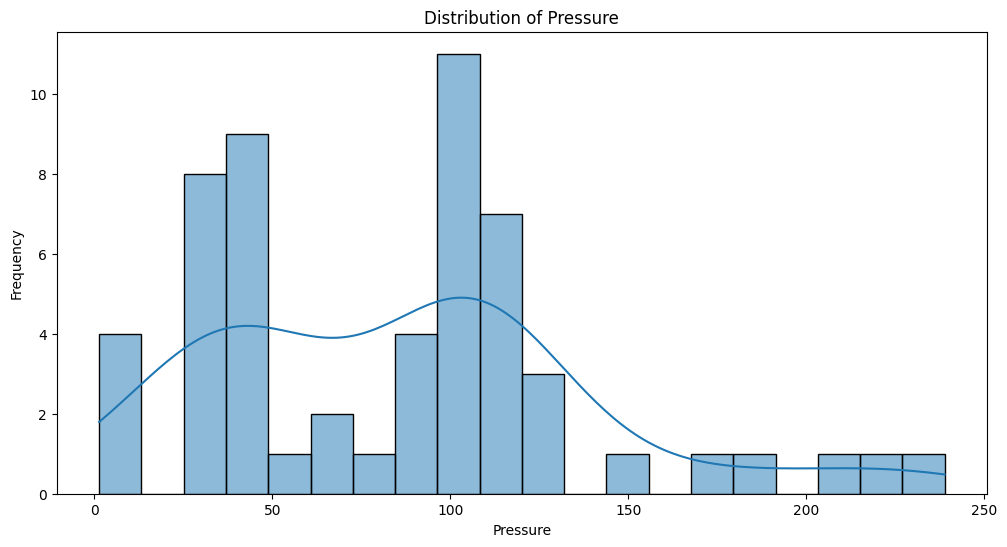

In [16]:
# Visualize the distribution of the target variable (Pressure)
plt.figure(figsize=(12, 6))
sns.histplot(df['Pressure'], bins=20, kde=True)
plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

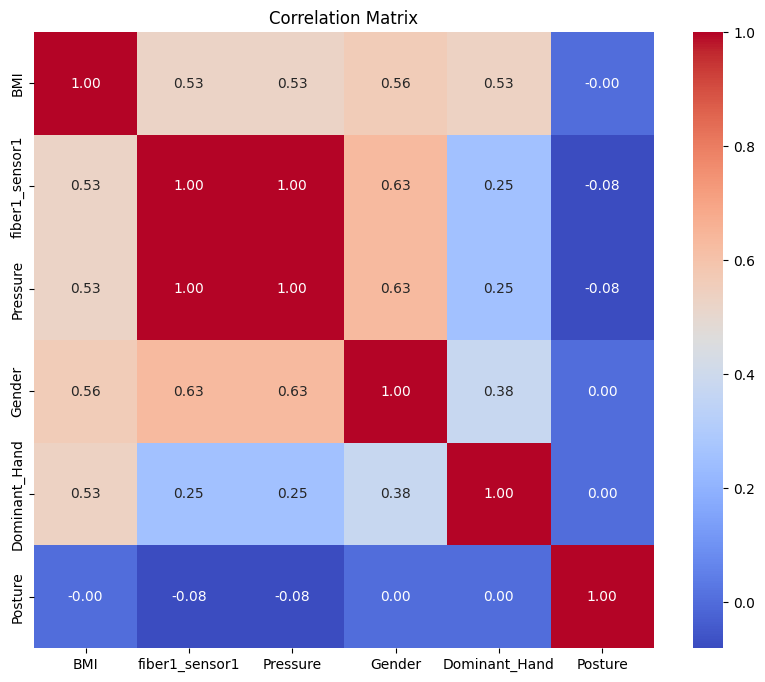

In [17]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

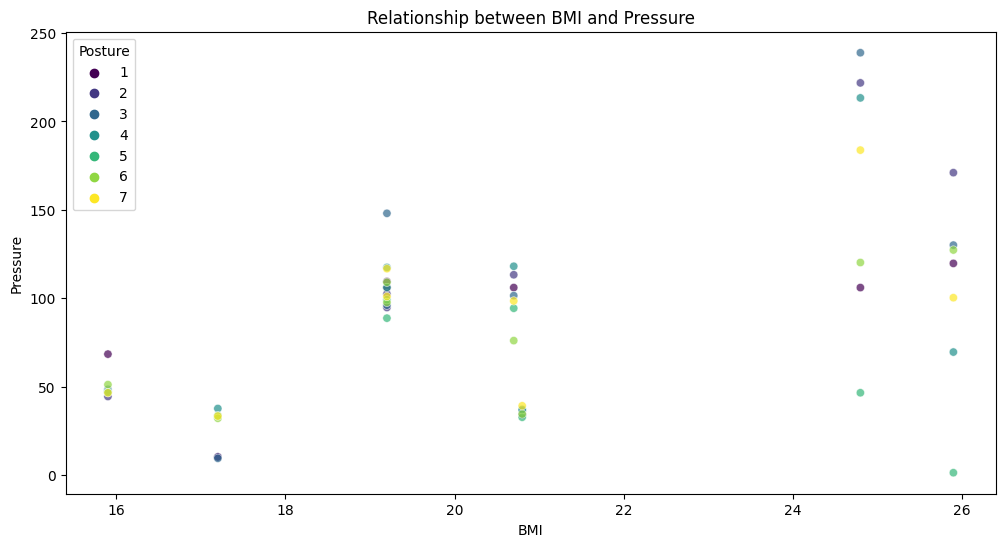

In [18]:
# Visualize the relationship between BMI and Pressure
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BMI', y='Pressure', data=df, hue='Posture', palette='viridis', alpha=0.7)
plt.title('Relationship between BMI and Pressure')
plt.xlabel('BMI')
plt.ylabel('Pressure')
plt.legend(title='Posture')
plt.show()

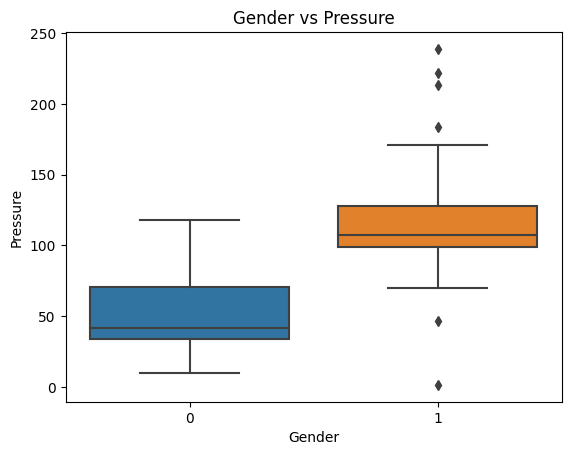

In [19]:
# Visualize the relationship between Gender and Pressure
sns.boxplot(x='Gender', y='Pressure', data=df)
plt.title('Gender vs Pressure')
plt.show()

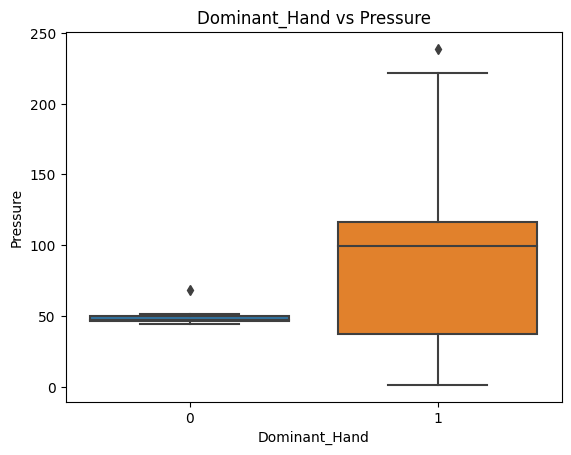

In [20]:
# Visualize the relationship between Dominant_Hand and Pressure
sns.boxplot(x='Dominant_Hand', y='Pressure', data=df)
plt.title('Dominant_Hand vs Pressure')
plt.show()

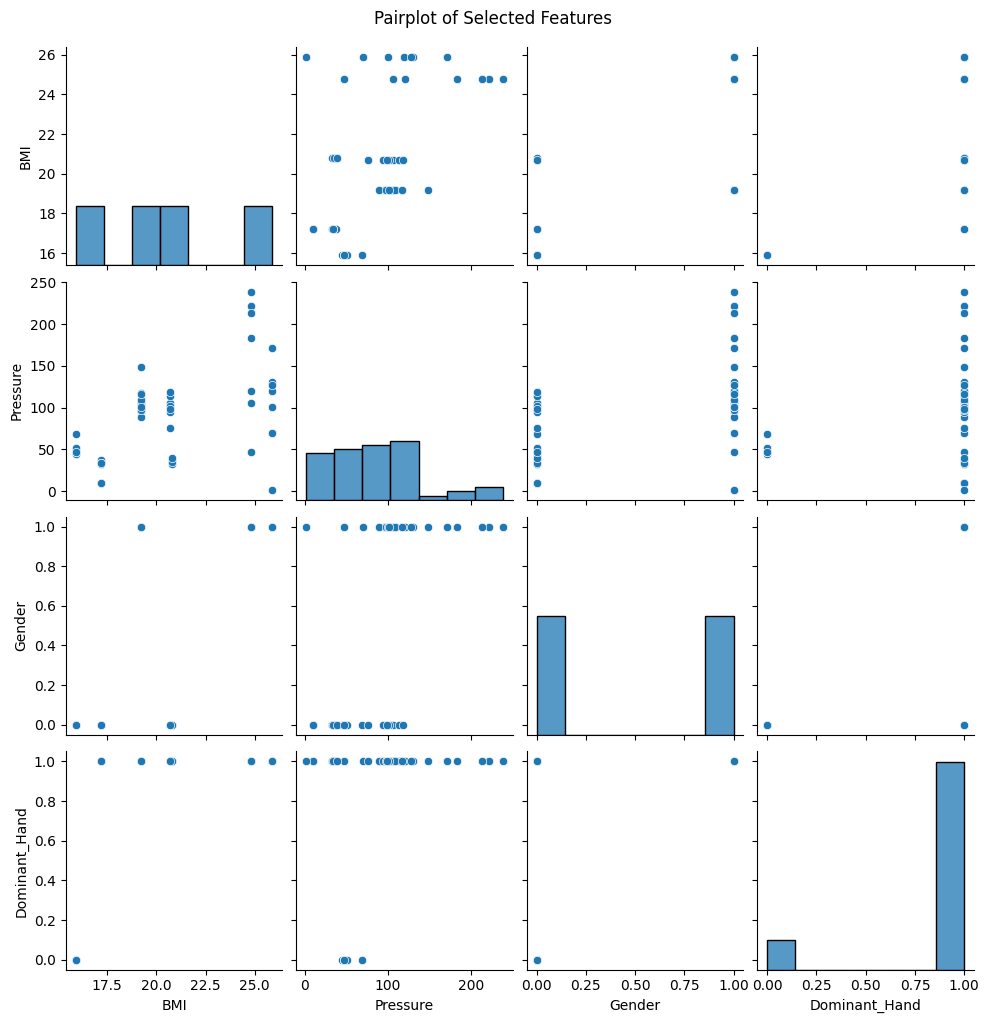

In [21]:
# Pairplot for selected features
selected_features = ['BMI', 'Pressure', 'Gender', 'Dominant_Hand']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

###Data Preprocessing

In [22]:
# Select features and target variable
X = df[['BMI', 'Gender', 'Dominant_Hand','Posture']]
y = df['Pressure']

###Train-Test Split

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Train Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
# Initialize the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)

In [26]:
# Evaluate the performance of the models
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')
print(f'Linear Regression R^2 Score: {linear_r2}')

Linear Regression Mean Squared Error: 2846.176028850389
Linear Regression R^2 Score: 0.35231784721234616


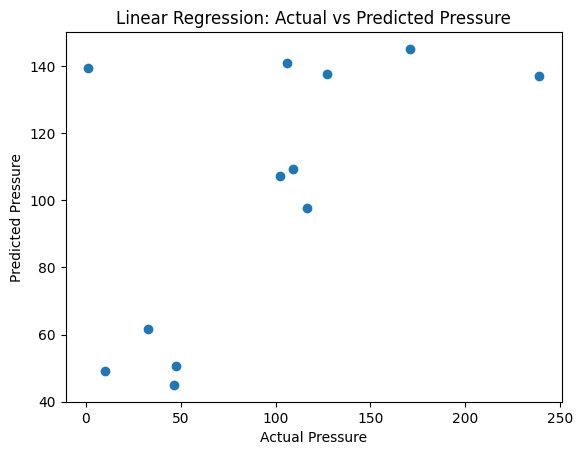

In [27]:
# Scatter plot for Actual vs Predicted Temperature
plt.scatter(y_test, linear_predictions)
plt.xlabel("Actual Pressure")
plt.ylabel("Predicted Pressure")
plt.title("Linear Regression: Actual vs Predicted Pressure")
plt.show()

<ipython-input-28-a5cfc54fa1cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


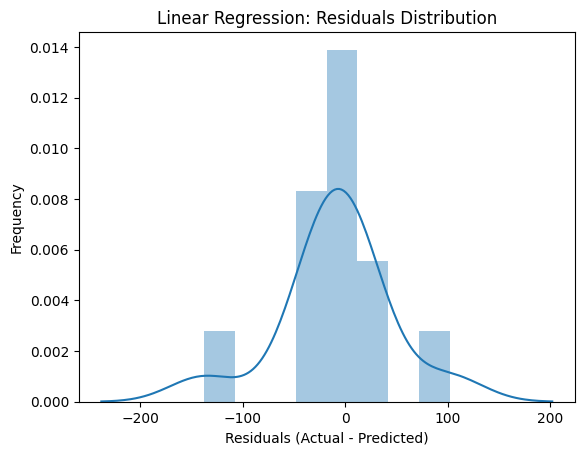

In [28]:
# Residual plot
diff = y_test - linear_predictions
sns.distplot(diff)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residuals Distribution")
plt.show()

In [29]:
linear_model.predict([[50,1,0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([295.52591486])

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Linear Regression
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {linear_cv_scores}')
print(f'Mean R^2 score: {linear_cv_scores.mean()}')

Cross-validated R^2 scores: [ 0.50111239  0.45735118  0.41371137 -1.47147828  0.30867412]
Mean R^2 score: 0.041874158982492804


###Train Random Forest Regressor Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

In [33]:
# Evaluate the performance of the model
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest Mean Squared Error: {random_forest_mse}')
print(f'Random Forest R^2 Score: {random_forest_r2}')

Random Forest Mean Squared Error: 1453.230747576715
Random Forest R^2 Score: 0.6692995761516989


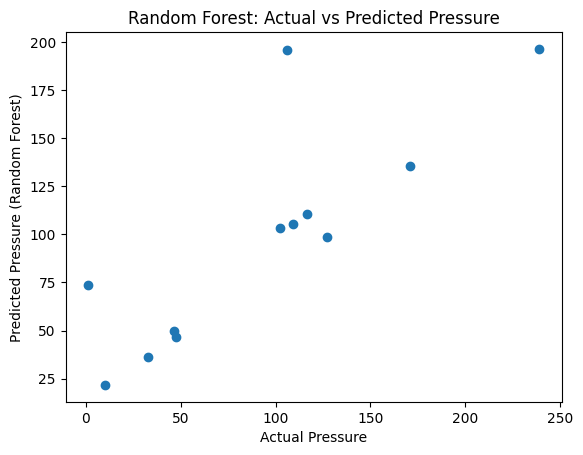

In [34]:
# Scatter plot for Actual vs Predicted Pressure (Random Forest)
plt.scatter(y_test, random_forest_predictions)
plt.xlabel("Actual Pressure")
plt.ylabel("Predicted Pressure (Random Forest)")
plt.title("Random Forest: Actual vs Predicted Pressure")
plt.show()

<ipython-input-35-68b99a9093a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_forest_diff)


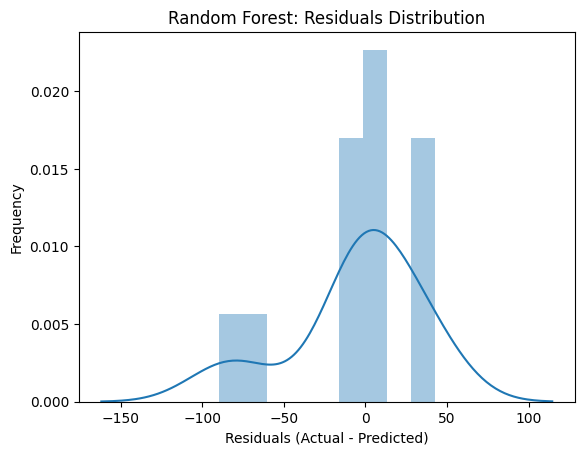

In [35]:
# Residual plot for Random Forest
random_forest_diff = y_test - random_forest_predictions
sns.distplot(random_forest_diff)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Random Forest: Residuals Distribution")
plt.show()

In [36]:
# Cross-validation for Random Forest
random_forest_cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores for Random Forest: {random_forest_cv_scores}')
print(f'Mean R^2 score for Random Forest: {random_forest_cv_scores.mean()}')

Cross-validated R^2 scores for Random Forest: [ 0.57206751  0.81589068  0.84144124 -1.33419814  0.70391235]
Mean R^2 score for Random Forest: 0.3198227281244772


In [37]:
random_forest_model.predict([[19,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([104.00844557])

###Improving accuracy by standardization

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test_scaled)

# Evaluate the performance of the model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')
print(f'Linear Regression R^2 Score: {linear_r2}')

Linear Regression Mean Squared Error: 2846.176028850389
Linear Regression R^2 Score: 0.35231784721234616


###Adding polynomial features to linear regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
# Add polynomial features
poly = PolynomialFeatures(degree=30)
X_poly = poly.fit_transform(X)

In [41]:
# Train-test split
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [42]:
# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [43]:
# Make predictions on the test set
poly_predictions = poly_model.predict(poly.fit_transform(X_test))

In [44]:
# Evaluate the performance of the model
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)
print(f'Polynomial Regression Mean Squared Error: {poly_mse}')
print(f'Polynomial Regression R^2 Score: {poly_r2}')

Polynomial Regression Mean Squared Error: 161018427033.35132
Polynomial Regression R^2 Score: -36641710.68694948


###Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Compute Mean Squared Error (MSE)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Compute R^2 score
gb_r2 = r2_score(y_test, gb_predictions)

print(f'Mean Squared Error (Gradient Boosting): {gb_mse}')
print(f'R^2 score (Gradient Boosting): {gb_r2}')


Mean Squared Error (Gradient Boosting): 1533.1635474663938
R^2 score (Gradient Boosting): 0.6511098902762953


In [46]:
# Cross-validation with Gradient Boosting Regressor
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores (Gradient Boosting): {gb_cv_scores}')
print(f'Mean R^2 score (Gradient Boosting): {gb_cv_scores.mean()}')


Cross-validated R^2 scores (Gradient Boosting): [ 0.43993176  0.7901372   0.78485016 -1.32095369  0.60451598]
Mean R^2 score (Gradient Boosting): 0.2596962823547785


###Ridge Model

In [47]:
from sklearn.linear_model import Ridge

# Train Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test_scaled)

# Evaluate the performance of the Ridge Regression model
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Ridge Regression R^2 Score: {ridge_r2}')


Ridge Regression R^2 Score: 0.3524498107847006


### XGBoost Model

In [48]:
import xgboost as xgb

# Train XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the performance of the XGBoost model
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost R^2 Score: {xgb_r2}')

XGBoost R^2 Score: 0.538119021604657


In [49]:
# Compare R^2 scores and suggest the best model
model_scores = {'Linear Regression': linear_r2,'Gradient Boosting': gb_r2, 'Ridge Regression': ridge_r2}

best_model = max(model_scores, key=model_scores.get)
print(f'The best model based on R^2 score is: {best_model} with R^2 score of {model_scores[best_model]}')


The best model based on R^2 score is: Gradient Boosting with R^2 score of 0.6511098902762953


###BEST Model Gradient Boosting Regression so lets deep dive into it

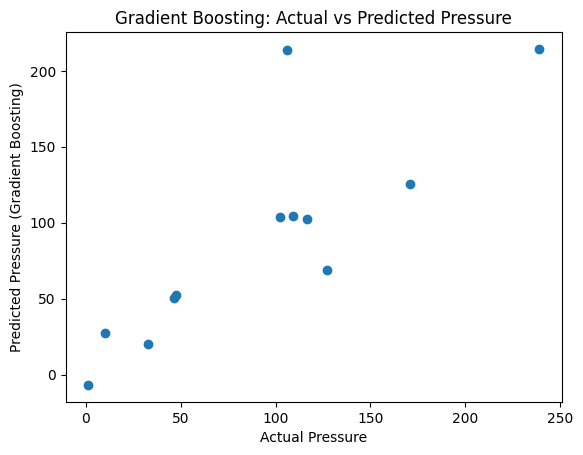

In [50]:
# Visualize Gradient Boosting Regressor results
# Scatter plot for Actual vs Predicted Pressure (Gradient Boosting)
plt.scatter(y_test, gb_predictions)
plt.xlabel("Actual Pressure")
plt.ylabel("Predicted Pressure (Gradient Boosting)")
plt.title("Gradient Boosting: Actual vs Predicted Pressure")
plt.show()

<ipython-input-51-903b742841c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gb_diff)


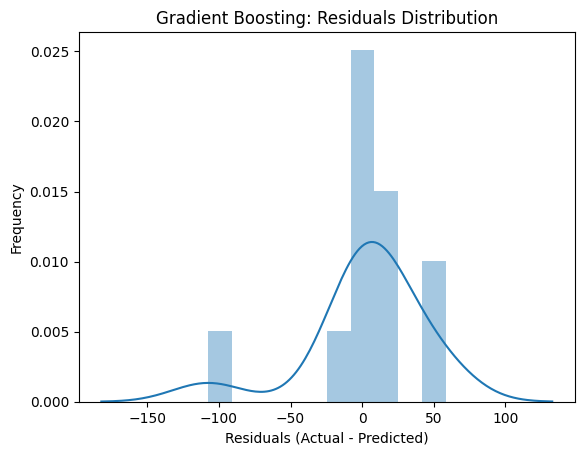

In [51]:
# Residual plot for Gradient Boosting
gb_diff = y_test - gb_predictions
sns.distplot(gb_diff)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Gradient Boosting: Residuals Distribution")
plt.show()


In [55]:
gb_model.predict([[20,1,1,7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([101.90396002])

In [62]:
import joblib
joblib.dump(gb_model, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [65]:
import sklearn
print(sklearn.__version__)

1.2.2
